# Lab 3: Clustering and Manifold Learning

NAME: Xinyi Li

STUDENT ID: 21147426

In this Notebook I will be introduced to standard techniques for unsupervised ML used also for EDA. These include the k-Means clustering algorithm and manifold-learning techniques, such as multi-dimensional scaling (MSD) and t-SNE. The goal of this exercise is to practice these techniques for discovering and visualising hidden patterns in data.

### Import Python Modules and Dataset

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Loading the dataset

In [122]:
df = pd.read_csv("./loans_train_prepared.csv")
data = df
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


In [123]:
df = df.drop('Unnamed: 0',axis=1)
df.isnull().sum()

Dependents                 0
ApplicantIncome            0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Gender_nan                 0
Married_Yes                0
Married_nan                0
Self_Employed_Yes          0
Self_Employed_nan          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
TotalIncome                0
dtype: int64

###  Using KNN Algorithm in the prepared dataset bank


In [124]:
df

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.082952,1.056390,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.924041,1.045549,0.750,1.0,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.681512,0.633249,0.750,1.0,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.606463,1.000974,0.750,1.0,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.100325,1.113997,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.860305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.664021,0.673577,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708
610,1.000000,0.856946,0.392461,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496
611,0.333333,1.312470,1.565057,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075
612,0.666667,1.266308,1.324336,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256


I will call the Kmeans method and have
- 3 cluster groups
- run 10 times with different random clusters and pick the min inertia
- run 300 iterations
and finally fitting the model with the data

In [125]:
k=3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [126]:
clustered_data_sklearn

KMeans(n_clusters=3)

In [127]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### Apply a manifold-learning technique to project the data set to a 2D space
https://scikit-learn.org/stable/modules/manifold.html

In [128]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

##### Use multi-dimensional scaling __MDS__ to project the dataset into 2d space and using a function __clustering_scatterplot__ to plot it.

In [129]:
#Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

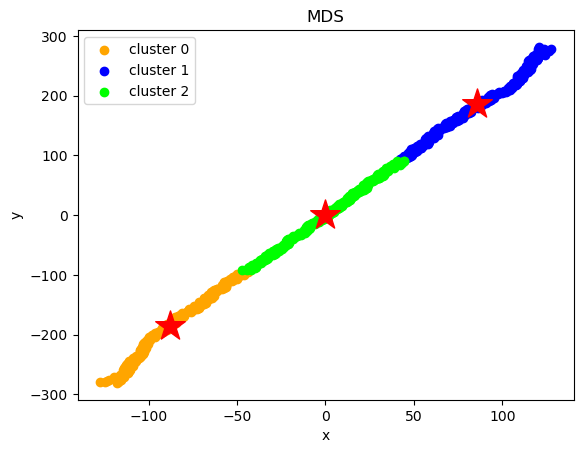

In [130]:
#Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

##### Use multi-dimensional scaling t-SNE to project the dataset into 2d space and using a function clustering_scatterplot to plot it.

In [131]:
#Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


transformation complete


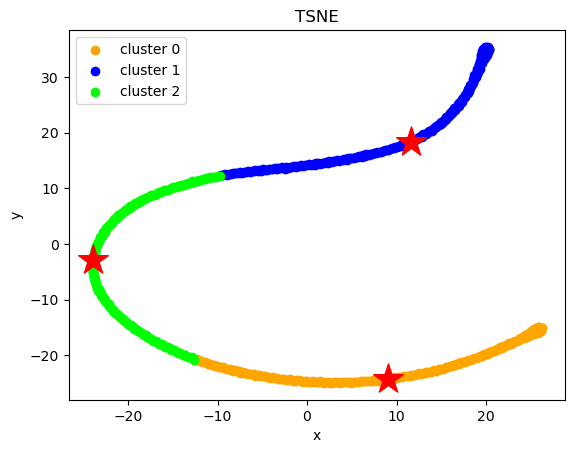

In [132]:
#Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### Cluster Analysis

In [133]:
#Add the cluster labels as an extra column in the original dataframe
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.082952,1.056390,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,1
1,0.333333,0.924041,1.045549,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,0.000000,0.681512,0.633249,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,1
3,0.000000,0.606463,1.000974,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,1
4,0.000000,1.100325,1.113997,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,1


In [134]:
#Compute the mean value of each attribute for each cluster
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.267974,0.912742,1.083100,0.707721,0.833333,0.789216,0.034314,0.661765,0.004902,0.156863,0.049020,0.254902,0.392157,0.264706,0.681373,0.875301
1,0.232520,0.920001,1.066707,0.713415,0.858537,0.834146,0.019512,0.682927,0.004878,0.121951,0.053659,0.204878,0.395122,0.390244,0.668293,0.875646
2,0.243902,0.911039,1.073461,0.718902,0.873171,0.765854,0.009756,0.600000,0.004878,0.121951,0.053659,0.195122,0.351220,0.331707,0.712195,0.837172


__Conclusion__

After observing the 3 clusters, I can make out that:

- cluster 0 has the highest Total income, ApplicantIncome, highest men and is the minimum number of people of loans.

- cluster 1 has the highest LoanAmount, women，Dependents，Self_Employed，and the maxnimum number of people of loans

- cluster 2 has the highest Credit_History, smallest group of married people, smallest group of women and Not Graduate and the group with the highest percentage of a positive Loan status.


### To find the best value of k using Elbow Criterion Method

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

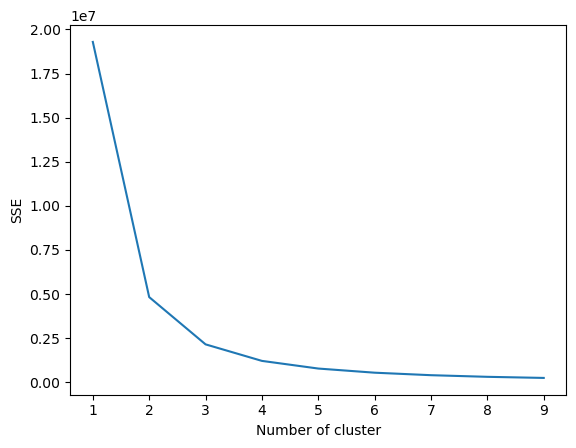

In [135]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [136]:
# X = data

# km = KMeans(n_clusters=3, random_state=42)
# #
# # Fit the KMeans model
# #
# km.fit_predict(X)
# #
# # Calculate Silhoutte Score
# #
# score = silhouette_score(X, km.labels_, metric='euclidean')
# #
# # Print the score
# #
# print('Silhouetter Score: %.3f' % score)

##### To find the best value of k using Silhouette method

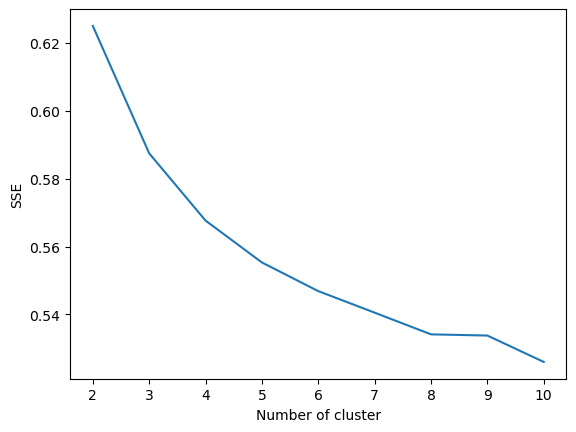

For n_clusters=10, the silhouette score is {2: 0.6250489191729186, 3: 0.5874915198209704, 4: 0.5676677873439407, 5: 0.5553249511328537, 6: 0.5468831377372835, 7: 0.5405356954296078, 8: 0.5341397672274572, 9: 0.5337851072995289, 10: 0.5260133871365117}


In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette = {}

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette[num_clusters] = silhouette_score(data, cluster_labels, metric= 'euclidean')
    
    
plt.figure()
plt.plot(list(silhouette.keys()), list(silhouette.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() 
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette))

Looking at the two methods above I can assume that the best value for k is 3


In [148]:
print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

Automatically created module for IPython interactive environment


### SpectralEmbedding
Learn from:https://github.com/Boontay/CS4168_Etivities/blob/main/Etivity%203.ipynb

In [149]:
X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape
np.random.seed(0)

In [150]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=2, n_neighbors=15)
X_se = se.fit_transform(data)
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.04s
average :	0.00s
complete :	0.00s
single :	0.00s


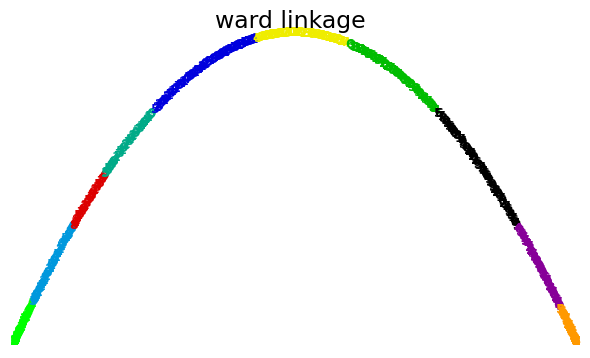

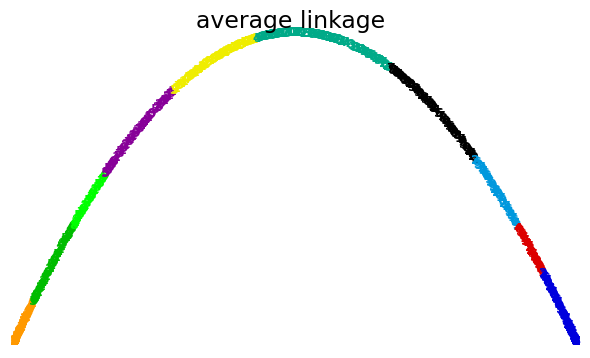

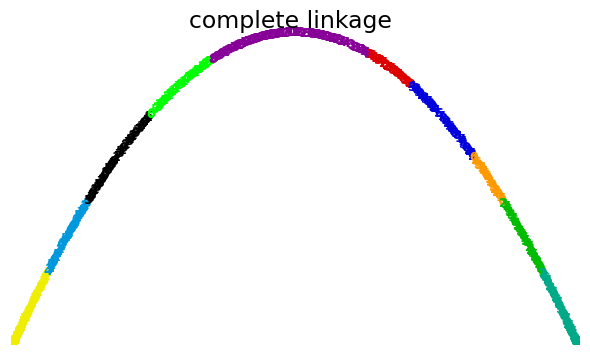

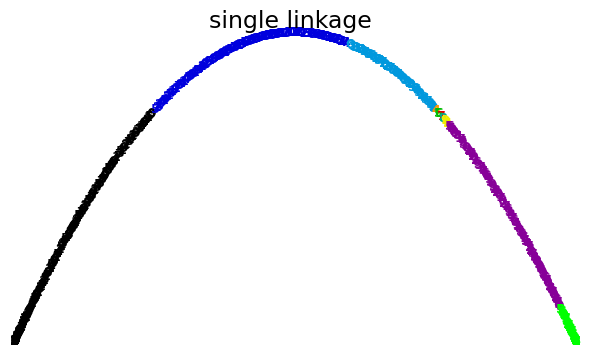

In [151]:
#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
X_red = X_se
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)